# Macrodispersivity

## Overview
Collection, analysis and plots of reliable values for longitudinal, transverse horizontal and transverse vertical dispersivity from field tracer tests, based on the three publications:
* *Is unique scaling of aquifer macrodispersivity supported by field data?* Zech et al, 2015, Water Resour. Res., 51,  [https://doi.org/10.1002/2015WR017220](https://doi.org/10.1002/2015WR017220).
* *A Critical Analysis of Transverse Dispersivity  Field Data* Zech et al, 2018, Groundwater, [https://doi.org/10.1111/gwat.12838](https://doi.org/10.1111/gwat.12838)
* *Evidence Based Estimation of Macrodispersivity  for Groundwater Transport Applications* by Zech et al, 2022, Groundwater, [https://doi.org/10.1111/gwat.13252](https://doi.org/10.1111/gwat.13252)




In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Data

Extensive summary of reliable macrodispersivities for all sites, with additional information and sorted by level of heterogeneity:

In [2]:
data_xlsx = pd.read_excel("./data/Dispersivity_GeoStats.xlsx",skiprows = [1])
#display(data_xlsx)

Reliable Macrodispersivities for selected sites which provide spatial evolution from experimental data (scale dependent longitudinal dispersivity):

In [3]:
data_aquifers = pd.read_excel("./data/Aquifer_dispersivities_assympotic.xlsx")#,sep = ',')
#display(data_aquifers)

---
## Reliable Macrodispersivity from Field Tracer Tests

Reproducing analysis and plots from papers as starting point for preparing condensed figures for lectures and lectures notes.

### Longitudinal Macrodispersivity

#### Data collection of Longitudinal Macrodispersivity vs scale

Reproducing **Zech et al, 2015, Figure 4** of *Is unique scaling of aquifer macrodispersivity supported by field data?* 

Using implemented functions for data extraction, analysis and visualization:

Save figure to ./results/Zech-et-al-2015_Fig4_Longitudinal_Dispersivities.pdf


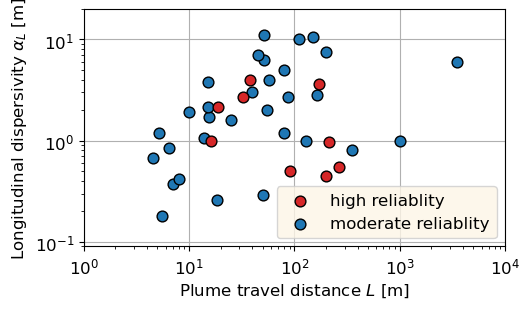

In [4]:
# direct plotting using predefined plot settings from visualize
from scripts.data.data_dispersivity_table import select_data_alphaL
from scripts.visualize.plot_dispersivity_data import plot_alphaL_vs_scale

### Read relevant data for plot from DataFrame
data_alphaL = select_data_alphaL(data_xlsx)

### Reproducing Figure 2b
fig = plot_alphaL_vs_scale(data_alphaL,
                           save_fig = "./results/Zech-et-al-2015_Fig4_Longitudinal_Dispersivities.pdf")

*Caption:* Reevaluated and newly evaluated macrodispersivities of high and moderate reliability, reduced to one value per field site and experiment, enamely the value of highest reliability.

Performing steps for individual adaption:

In [5]:
### Filter Reliability
filter_R1 = (data_xlsx["Reliability – A_L"]==1) #high reliability
filter_R2 = (data_xlsx["Reliability – A_L"]==2) #moderate reliability

### Filter data for scales and alpha_L values for both reliabilities
scale_R1 = data_xlsx["Scale"][filter_R1]
aL_R1 = data_xlsx["A_L"][filter_R1]

scale_R2 = data_xlsx["Scale"][filter_R2]
aL_R2 = data_xlsx["A_L"][filter_R2]

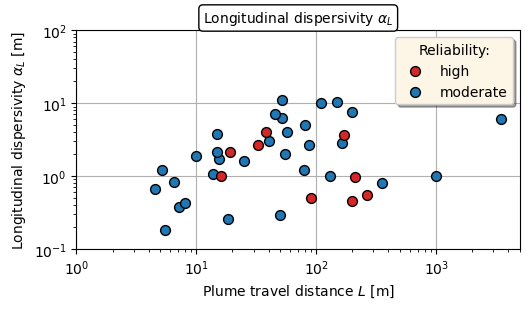

In [6]:
# plotting allowing changes of plot settings
plt.figure(1,figsize=[5.4,3.2])
plt.scatter(scale_R1,aL_R1,color= "C3",marker="o",zorder = 11,edgecolor="k",s=50,label=r"high")
plt.scatter(scale_R2,aL_R2,color="C0",marker="o",zorder = 10,edgecolor="k",s=50,label=r"moderate")

textsize=10
plt.xlabel("Plume travel distance $L$ [m]",fontsize=textsize)
plt.ylabel(r"Longitudinal dispersivity $\alpha_L$ [m]",fontsize=textsize)
plt.grid(True)
plt.xscale("log")
plt.xlim([1,5000])
plt.yscale("log")
plt.ylim([0.1,100])
plt.title(r"Longitudinal dispersivity $\alpha_L$",fontsize=textsize,bbox=dict(facecolor="w",boxstyle="round"))
plt.tick_params(axis="both",which="major",labelsize=textsize)
plt.legend(title = "Reliability:",loc="upper right",fontsize=textsize,title_fontsize=textsize,facecolor="oldlace",framealpha = 1,shadow=True)

plt.tight_layout()
# plt.savefig("./results/Zech-et-al-2015_Fig4_Longitudinal_Dispersivities.png", dpi=300)
# plt.savefig("./results/Zech-et-al-2015_Fig4_Longitudinal_Dispersivities.pdf")

## Plot combination: Longitudinal macrodispersivities in log and semi-log scale
(developed for teaching purpose)

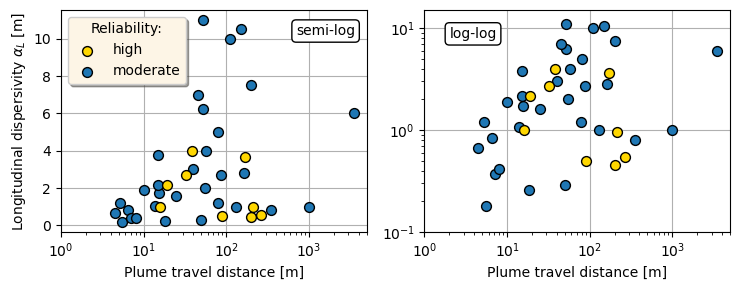

In [7]:
fig, axes = plt.subplots(nrows = 1, ncols = 2,figsize=[7.5,3.])#, sharey=True)
for i in [0,1]:
    axes[i].scatter(scale_R1,aL_R1,color="gold",marker="o",zorder = 11,edgecolor="k",s=50,label=r"high")
    axes[i].scatter(scale_R2,aL_R2,color="C0",marker="o",zorder = 10,edgecolor="k",s=50,label=r"moderate")
    axes[i].set_xlabel("Plume travel distance [m]",fontsize=textsize)
    axes[i].tick_params(axis="both",which="major",labelsize=textsize)
    axes[i].grid(True)
    axes[i].set_xscale("log")
    axes[i].set_xlim([1,5000])

axes[1].set_yscale("log")
axes[1].set_ylim([0.1,15])
axes[0].set_ylabel(r"Longitudinal dispersivity $\alpha_L$ [m]",fontsize=textsize)
axes[0].legend(title = "Reliability:",loc="upper left",fontsize=textsize,title_fontsize=textsize,facecolor="oldlace",shadow = True,framealpha = 1)

axes[0].text(700,10.2,r"semi-log",fontsize=textsize,bbox=dict(facecolor="w",boxstyle="round"))
axes[1].text(2,8,r"log-log",fontsize=textsize,bbox=dict(facecolor="w",boxstyle="round"))

plt.tight_layout()
# plt.savefig('./results/Data_long_dispersivities.png',dpi = 300)

---
#### Aquifer specific Longitudinal macrodispersivity vs scale
Reproducing **Zech et al, 2015, Figure 5** of *Is unique scaling of aquifer macrodispersivity supported by field data?* 

Caption: Spatial evolution of longitudinal macrodispersivity ($\alpha_L$ versus plume travel distance) for a few selected aquifers: Chalk River [Moltyaner et al., 1993], Borden [Freyberg, 1986; Rajaram and Gelhar, 1991], Cape Cod [Garabedian et al., 1991], Krauthausen [Vereecken et al., 2000], Horkheimer Insel [Ptak and Teutsch, 1994], Corbas [Sauty, 1977; Welty and Gelhar, 1989]. Circles for $\alpha_L$ values of highly reliable and diamonds for moderately reliable sites. Triangles on the left denote asymptotic value from theory linking to heterogeneity of hydraulic conductivity: $\alpha_L = \sigma^2 \cdot \ell$, where $\sigma^2$ is the log-conductivity variance and $\ell$ is the correlation length/integral scale. 

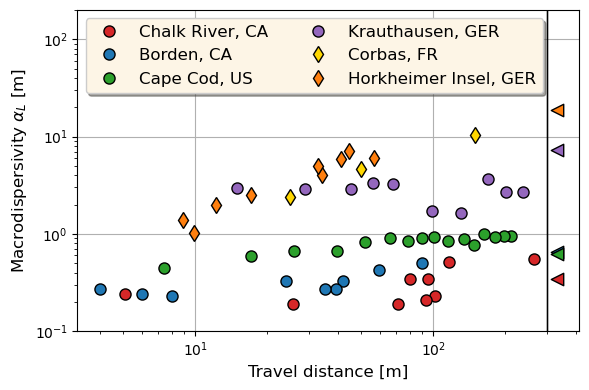

In [8]:
# direct plotting using predefined plot settings from visualize
from scripts.visualize.plot_dispersivity_data import plot_aL_aquifer

fig = plot_aL_aquifer(data_aquifers,
                figsize= [6,4],
                ylim = [0.1,200])
#                save_fig = './results/Zech-et-al-2015_Fig5_Aquifer_dispersivities.pdf')

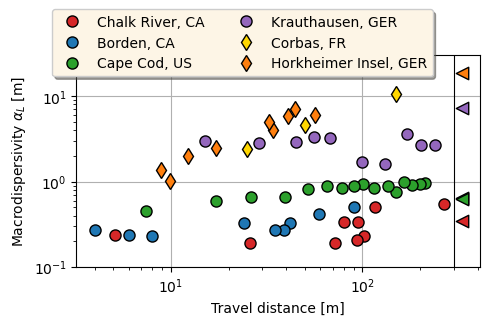

In [9]:
#display(data_aquifers)
marker = ["o","d"]
colors = ["C3","C0","C2","C4","gold","C1"]

plt.figure(figsize=[5,3.5])
for j,i in enumerate([1,5,3,2,4,8]): #range(1,10): #
    filter_exp = data_aquifers["Experiment"] == i
    site_name = data_aquifers["site name"].loc[filter_exp].iloc[0]
    reliability = data_aquifers["reliability"].loc[filter_exp].iloc[0]
    sigma = data_aquifers["sigma"].loc[filter_exp].iloc[0]
    ell = data_aquifers["ell"].loc[filter_exp].iloc[0]
    plt.plot(data_aquifers["scale"].loc[filter_exp],data_aquifers["AL"].loc[filter_exp],marker = marker[reliability-1],ms = 8,mec = "k",ls = "",c = colors[j],label = site_name)
    plt.scatter(330,sigma*ell,marker = "<",s = 80,edgecolors = "k",color = colors[j])
plt.plot([300,300],[0,30],c="k",lw = 0.8)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Travel distance [m]",fontsize = textsize)
plt.ylabel(r"Macrodispersivity $\alpha_L$ [m]",fontsize = textsize)
plt.ylim([0.1,30])
plt.grid(True)
plt.legend(ncols=2,fontsize = textsize,bbox_to_anchor=(0.9, 1.25),framealpha = 1,shadow=True,facecolor="oldlace")
#plt.legend(ncols=2,fontsize = textsize,bbox_to_anchor=(0.85, 1.1),framealpha = 1,shadow=True,facecolor='oldlace')

plt.tight_layout()
plt.savefig("./results/Zech-et-al-2015_Fig5_Aquifer_dispersivities.pdf")
#plt.savefig('./results/Zech-et-al-2015_Fig5_Aquifer_dispersivities.png',dpi = 300)

-------------
### Transverse dispersivities

#### Transverse dispersivities versus scale

Reproducing **Zech et al, 2018, Figure 2a** of *A Critical Analysis of Transverse Dispersivity  Field Data*

*Caption:* (a) Reliable transverse horizontal $\alpha_T$ and transverse vertical dispersivities $\alpha_V$ vs. observation scale (=plume travel distance) $L$. Values are marked according to high (R1, red) and moderate (R2, blue) reliability.

Using implemented functions for data extraction, analysis and visualization:

Save figure to ./results/Zech-et-al-2019_Fig2_Transverse_dispersivities.pdf


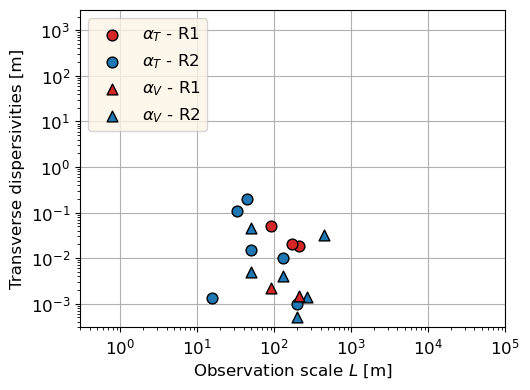

In [10]:
from scripts.data.data_dispersivity_table import select_data_alphaTV
from scripts.visualize.plot_dispersivity_data import plot_alphaTV_vs_scale

data_alphaTV = select_data_alphaTV(data_xlsx)
fig = plot_alphaTV_vs_scale(data_alphaTV,
                           save_fig = "./results/Zech-et-al-2019_Fig2_Transverse_dispersivities.pdf")

#### Transverse horizontal dispersivities versus scale

Modifications of plot for different (more zoomed in) view of data.

*Caption:* (a) Reliable transverse horizontal $\alpha_T$ vs. observation scale (=plume travel distance) $L$ in log-linear scale. Values are marked according to high (R1, red) and moderate (R2, blue) reliability.

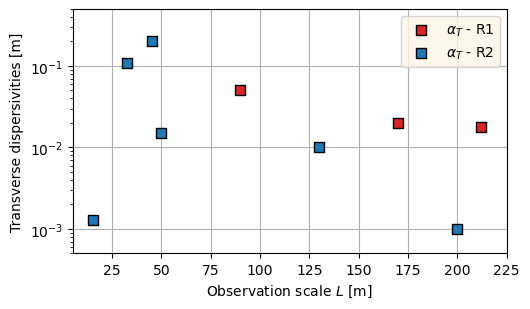

In [11]:
fig = plot_alphaTV_vs_scale(data_alphaTV,
                            marker_AT = "s",
                            marker_AV = False,
                            figsize=[5.4,3.2],
                            xlim = [5,225],
                            ylim = [0.0005,0.5],
                            xscale = "linear",
                            loc = "upper right",
                            textsize=10,
                            )

Proceduring Figures step by step for individual adaption:

In [12]:
### Filter Reliability
filter_R1_aTaV = (data_xlsx["Reliability – A_T/A_V"]==1) #high reliability
filter_R2_aTaV = (data_xlsx["Reliability – A_T/A_V"]==2) #moderate reliability

### Filter data for scales and alpha_T values for both reliabilities
scale_aTV_R1 = data_xlsx["Scale"][filter_R1_aTaV]
scale_aTV_R2 = data_xlsx["Scale"][filter_R2_aTaV]

aT_R1 = data_xlsx["A_T"][filter_R1_aTaV]
aT_R2 = data_xlsx["A_T"][filter_R2_aTaV]

aV_R1 = data_xlsx["A_V"][filter_R1_aTaV]
aV_R2 = data_xlsx["A_V"][filter_R2_aTaV]

### Filter AL data for ratio plots for both reliabilities
aL_TV_R1 = data_xlsx["A_L"][filter_R1_aTaV]
aL_TV_R2 = data_xlsx["A_L"][filter_R2_aTaV]

In [13]:
print("Minimum values of tranverse horizontal dispersivity A_T [m]:", data_xlsx["A_T"].min())
print("Maximum values of tranverse horizontal dispersivity A_T [m]:", data_xlsx["A_T"].max())
print("Minimum values of tranverse vertical dispersivity A_V [m]:", data_xlsx["A_V"].min())
print("Maximum values of tranverse vertical dispersivity A_V [m]:", data_xlsx["A_V"].max())

Minimum values of tranverse horizontal dispersivity A_T [m]: 0.001
Maximum values of tranverse horizontal dispersivity A_T [m]: 0.2
Minimum values of tranverse vertical dispersivity A_V [m]: 0.0005
Maximum values of tranverse vertical dispersivity A_V [m]: 0.06


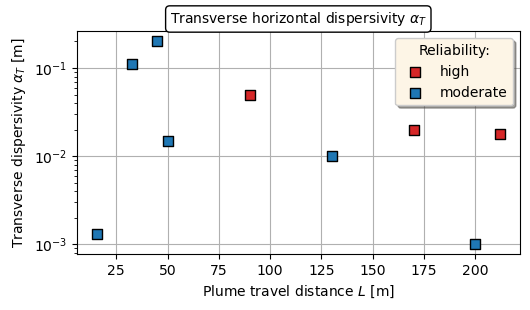

In [14]:
### Plotting transverse horizontal dispersivity
plt.figure(figsize=[5.4,3.2])
textsize=10

plt.scatter(scale_aTV_R1,aT_R1,color="C3",marker="s",edgecolor="k",zorder = 10,s=50,label=r"high")
plt.scatter(scale_aTV_R2,aT_R2,color="C0",marker="s",edgecolor="k",zorder = 10,s=50,label=r"moderate")

plt.legend(loc="upper center",fontsize=textsize,ncol=2,facecolor="oldlace")
plt.xlabel("Plume travel distance $L$ [m]",fontsize=textsize)
plt.ylabel(r"Transverse dispersivity $\alpha_T$ [m]",fontsize=textsize)
plt.grid(True)
#plt.xscale('log')
plt.yscale("log")
plt.tick_params(axis="both",which="major",labelsize=textsize)
plt.title(r"Transverse horizontal dispersivity $\alpha_T$",fontsize=textsize,bbox=dict(facecolor="w",boxstyle="round"))
plt.legend(title = "Reliability:",loc="upper right",fontsize=textsize,title_fontsize=textsize,facecolor="oldlace",framealpha = 1,shadow=True)

plt.tight_layout()
# plt.savefig("./results/Zech-et-al-2019_Fig2a_Transverse_dispersivities_AT.pdf", dpi=300)

*Caption:* Reliable transverse horizontal dispersivities $\alpha_T$ vs. observation scale (=plume travel distance) $L$. Values are marked according to high (R1, red) and moderate (R2, blue) reliability.

#### Transverse vertical dispersivities versus scale

Modifications of plot **Zech et al, 2019, Figure 2a** for different (more zoomed in) view of data.

*Caption:* (a) Reliable transverse vertical $\alpha_V$ vs. observation scale (=plume travel distance) $L$ in log-linear scale. Values are marked according to high (R1, red) and moderate (R2, blue) reliability.

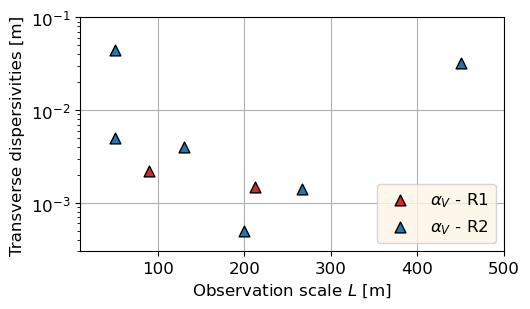

In [15]:
fig = plot_alphaTV_vs_scale(data_alphaTV,
                            marker_AT = False,
                            figsize=[5.4,3.2],
                            xlim = [10,500],
                            ylim = [0.0003,0.1],
                            xscale = "linear",
                            loc = "lower right",
                            )

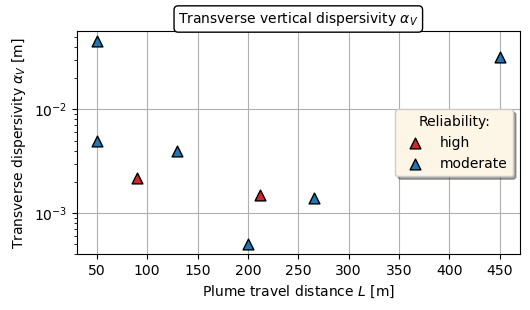

In [16]:
### Plotting transverse vertical dispersivity
plt.figure(1,figsize=[5.4,3.2])

plt.scatter(scale_aTV_R1,aV_R1,color="C3",marker="^",edgecolor="k",zorder=10,s=60,label=r"high")
plt.scatter(scale_aTV_R2,aV_R2,color="C0",marker="^",edgecolor="k",zorder=10,s=60,label=r"moderate")

plt.xlabel("Plume travel distance $L$ [m]",fontsize=textsize)
plt.ylabel(r"Transverse dispersivity $\alpha_V$ [m]",fontsize=textsize)
plt.grid(True)
#plt.xscale('log')
plt.yscale("log")
plt.tick_params(axis="both",which="major",labelsize=textsize)
plt.title(r"Transverse vertical dispersivity $\alpha_V$",fontsize=textsize,bbox=dict(facecolor="w",boxstyle="round"))
plt.legend(title = "Reliability:",loc="center right",fontsize=textsize,title_fontsize=textsize,facecolor="oldlace",framealpha = 1,shadow=True)

plt.tight_layout()
# plt.savefig("./results/Zech-et-al-2019_Fig2a_Transverse_Dispersivities_AV.png", dpi=300)

Caption: (a) Reliable transverse vertical dispersivities $\alpha_V$ vs. observation scale (=plume travel distance) $L$. Values are marked according to high (R1, red) and moderate (R2, blue) reliability.

### Ratios between dispersivities

#### All dispersivity ratios versus scale

Reproducing **Zech et al, 2019, Figure 3** of *A Critical Analysis of Transverse Dispersivity  Field Data*

Relating longitudinal dispersivity $\alpha_L$, transverse horizontal dispersivity $\alpha_T$, and transverse vertical $\alpha_V$ dispersivity of high (R1, red) and moderate (R2, blue) reliability. The corresponding dispersivity values are listed in Table X.

Using implemented functions for data extraction and visualization:

Save figure to ./results/Zech-et-al-2019_Fig3_Ratios_dispersivities.pdf


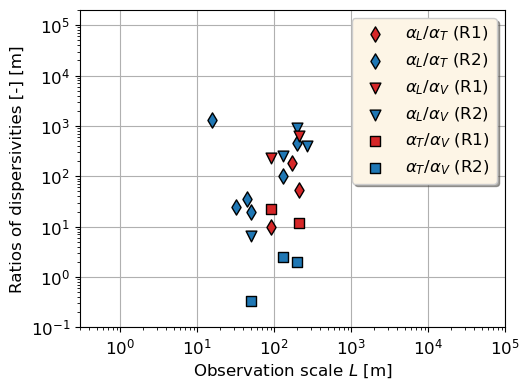

In [17]:
from scripts.data.data_dispersivity_table import ratios_data_alphaLTV
from scripts.data.data_dispersivity_table import select_data_alphaL
from scripts.data.data_dispersivity_table import select_data_alphaTV
from scripts.visualize.plot_dispersivity_data import plot_alphaL_vs_scale
from scripts.visualize.plot_dispersivity_data import plot_alphaTV_vs_scale
from scripts.visualize.plot_dispersivity_data import plot_ratios_alpha_vs_scale

ratios_alphaLTV = ratios_data_alphaLTV(data_xlsx)

fig = plot_ratios_alpha_vs_scale(ratios_alphaLTV,
                           save_fig = "./results/Zech-et-al-2019_Fig3_Ratios_dispersivities.pdf")


Caption: Ratios between longitudinal $\alpha_L$, transverse horizontal $\alpha_T$, and transverse vertical $\alpha_V$ dispersivities of high (R1) and moderate (R2) reliability.

Proceduring Figures step by step for individual adaption:

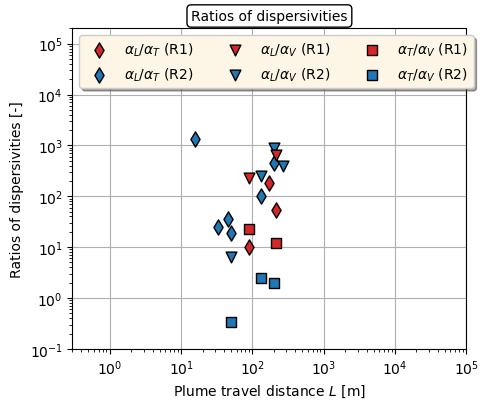

In [18]:
### Ratios of dispersivities
plt.figure(1,figsize=[5.0,4.2])
c_R1, c_R2 = "C3","C0"

plt.scatter(scale_aTV_R1,aL_TV_R1/aT_R1,color=c_R1,marker="d",zorder = 11,edgecolor="k",s=60,label=r"$\alpha_L/\alpha_T$ (R1)")
plt.scatter(scale_aTV_R2,aL_TV_R2/aT_R2,color=c_R2,marker="d",zorder = 10,edgecolor="k",s=60,label=r"$\alpha_L/\alpha_T$ (R2)")
plt.scatter(scale_aTV_R1,aL_TV_R1/aV_R1,color=c_R1,marker="v",zorder = 11,edgecolor="k",s=60,label=r"$\alpha_L/\alpha_V$ (R1)")
plt.scatter(scale_aTV_R2,aL_TV_R2/aV_R2,color=c_R2,marker="v",zorder = 10,edgecolor="k",s=60,label=r"$\alpha_L/\alpha_V$ (R2)")
plt.scatter(scale_aTV_R1,aT_R1/aV_R1,color=c_R1,marker="s",zorder = 11,edgecolor="k",s=60,label=r"$\alpha_T/\alpha_V$ (R1)")
plt.scatter(scale_aTV_R2,aT_R2/aV_R2,color=c_R2,marker="s",zorder = 10,edgecolor="k",s=60,label=r"$\alpha_T/\alpha_V$ (R2)")

plt.xlabel("Plume travel distance $L$ [m]",fontsize=textsize)
plt.ylabel(r"Ratios of dispersivities [-]",fontsize=textsize)
plt.grid(True)
plt.xscale("log")
plt.xlim([0.3,100000])
plt.yscale("log")
plt.ylim([0.1,200000])
plt.tick_params(axis="both",which="major",labelsize=textsize)
plt.title(r"Ratios of dispersivities",fontsize=textsize,bbox=dict(facecolor="w",boxstyle="round"))
plt.legend(loc="upper left",ncols = 3,fontsize=textsize,title_fontsize=textsize,facecolor="oldlace",framealpha = 1,shadow=True)

plt.tight_layout()
# plt.savefig("./results/Zech-et-al-2019_Fig3_Ratios_Dispersivities.png", dpi=300)

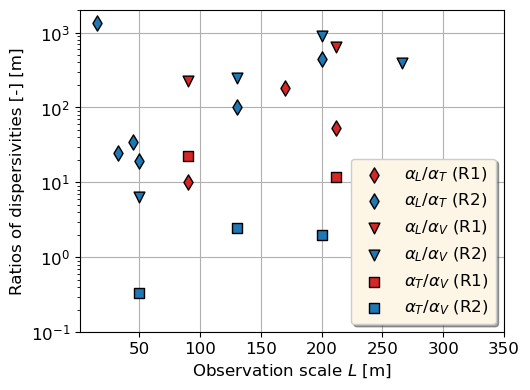

In [19]:
fig = plot_ratios_alpha_vs_scale(ratios_alphaLTV,
                                 xscale = "linear",
                                 xlim = [1,350],
                                 ylim = [0.1,2000],
                                 loc = "lower right",
                                )

#### Inverse scale

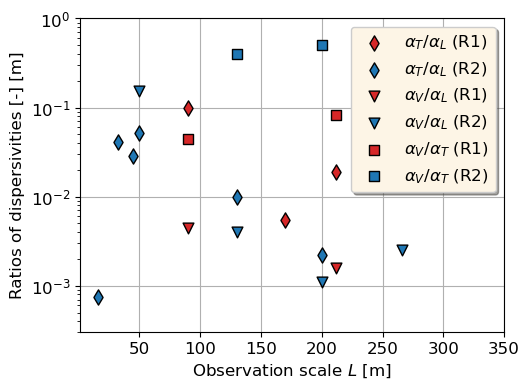

In [20]:
fig = plot_ratios_alpha_vs_scale(ratios_alphaLTV,
                                 marker_AL_AT = False,
                                 marker_AT_AL = "d",
                                 marker_AL_AV = False,
                                 marker_AV_AL = "v",
                                 marker_AT_AV = False,
                                 marker_AV_AT = "s",
                                 xscale = "linear",
                                 xlim = [1,350],
                                 ylim = [3e-4,1],
                                )

#### Ratios between transverse to longitudinal dispersivities

Caption: Ratio of transverse horizontal $\alpha_T$ to longitudinal $\alpha_L$ dispersivity of high (R1) and moderate (R2) reliability.

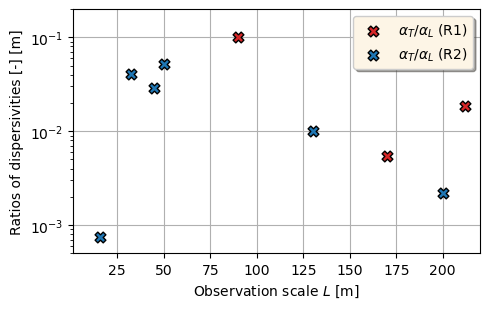

In [21]:
fig = plot_ratios_alpha_vs_scale(ratios_alphaLTV,
                                 figsize=[5.0,3.2],
                                 marker_AL_AT = False,
                                 marker_AT_AL = "X",
                                 marker_AL_AV = False,
                                 marker_AT_AV = False,
                                 xscale = "linear",
                                 xlim = [1,220],
                                 ylim = [5e-4,0.2],
                                 textsize = 10,
                                )

#### Ratios between transverse vertical to transverse horizontal dispersivities

Caption: Ratio of transverse vertical $\alpha_V$ to transverse horizontal $\alpha_T$ dispersivity of high (R1) and moderate (R2) reliability.

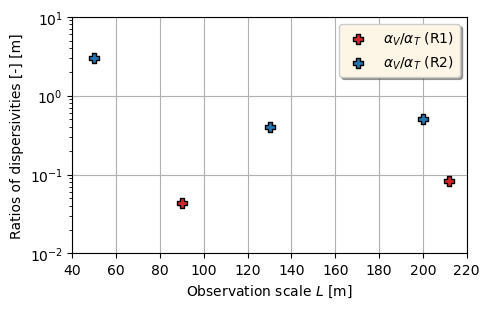

In [22]:
fig = plot_ratios_alpha_vs_scale(ratios_alphaLTV,
                                 figsize=[5.0,3.2],
                                 marker_AL_AT = False,
                                 marker_AL_AV = False,
                                 marker_AT_AV = False,
                                 marker_AV_AT = "P",
                                 xscale = "linear",
                                 xlim = [40,220],
                                 ylim = [0.01,10],
                                 textsize = 10,
                                )

### Plot combination: Transverse macrodispersivities and ratios
(developed for teaching purpose)

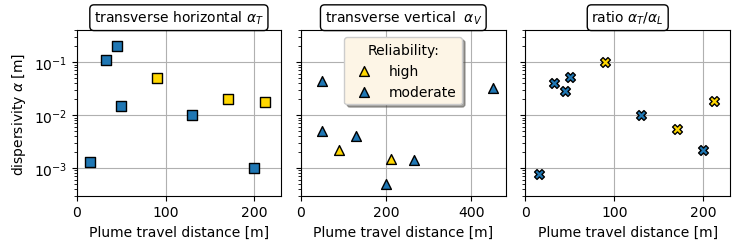

In [23]:
fig, axes = plt.subplots(nrows = 1, ncols = 3,figsize=[7.5,2.6], sharey=True)

for ii,ax in enumerate(axes.flat):
    if ii==0:
        ax.scatter(scale_aTV_R1,aT_R1, color="gold",marker="s",zorder = 11,edgecolor="k",s=50,label=r"high")
        ax.scatter(scale_aTV_R2,aT_R2, color="C0",marker="s",zorder = 10,edgecolor="k",s=50,label=r"moderate")
        ax.set_title(r"transverse horizontal $\alpha_T$",fontsize=textsize,bbox=dict(facecolor="w",boxstyle="round"))
        ax.set_xlabel("Plume travel distance [m]",fontsize=textsize)
        ax.set_ylabel(r"dispersivity $\alpha$ [m]",fontsize=textsize)
        ax.set_xlim([0,230])
        # ax.legend(title = 'Reliability:',loc='best',fontsize=textsize,title_fontsize=textsize,facecolor='oldlace',shadow=True)
    elif ii==1:
        ax.scatter(scale_aTV_R1,aV_R1, color="gold",marker="^",zorder = 11,edgecolor="k",s=50,label=r"high")
        ax.scatter(scale_aTV_R2,aV_R2, color="C0",marker="^",zorder = 10,edgecolor="k",s=50,label=r"moderate")
        ax.set_title(r"transverse vertical  $\alpha_V$",fontsize=textsize,bbox=dict(facecolor="w",boxstyle="round"))
        ax.set_xlabel("Plume travel distance [m]",fontsize=textsize)
        ax.legend(title = "Reliability:",loc="best",fontsize=textsize,title_fontsize=textsize,facecolor="oldlace",shadow=True)
        ax.set_xlim([0,480])
    elif ii==2:
        ax.scatter(scale_aTV_R1,aT_R1/aL_TV_R1,color="gold",marker="X",zorder = 11,edgecolor="k",s=50,label=r"high")
        ax.scatter(scale_aTV_R2,aT_R2/aL_TV_R2,color="C0",marker="X",zorder = 10,edgecolor="k",s=50,label=r"moderate")
        ax.set_title(r"ratio $\alpha_T/\alpha_L$",fontsize=textsize,bbox=dict(facecolor="w",boxstyle="round"))
        ax.set_xlabel("Plume travel distance [m]",fontsize=textsize)
        ax.set_xlim([0,230])
    ax.tick_params(axis="both",which="major",labelsize=textsize)
    ax.grid(True)
#    ax.set_xscale('log')
    ax.set_yscale("log")
    ax.set_ylim([3e-4,0.4])
plt.tight_layout()
# plt.savefig('./results/Data_trans_dispersivities.png',dpi = 300)

----------------
## Statistics of $\alpha_L$ for heterogeneity classes

### Averages and other measures for heterogeneity classes

Reproducing **Zech et al, 2022, Table 1** of *Evidence Based Estimation of Macrodispersivity  for Groundwater Transport Applications*

Either using implemented functions for data extraction, analysis and visualization or step by step procedure for individual adaption:

In [24]:
### Data handling: extract relevant information from file and store it in dictionary
from scripts.data.data_dispersivity_table import data_per_heterogeneity_class

data_het_classes = data_per_heterogeneity_class(data_xlsx)

In [25]:
from scripts.analysis.statistics import macrodispersivity_statistics

results = macrodispersivity_statistics(data_het_classes)


Level of Heterogeneity:  1
 Number of sites: 13
 Mean of AL (weighted): 1.14
 Std of AL: (weighted) 1.07
 Coefficient of Variation CV: 0.93

Level of Heterogeneity:  2
 Number of sites: 10
 Mean of AL (weighted): 3.21
 Std of AL: (weighted) 1.50
 Coefficient of Variation CV: 0.47

Level of Heterogeneity:  3
 Number of sites: 7
 Mean of AL (weighted): 7.50
 Std of AL: (weighted) 2.87
 Coefficient of Variation CV: 0.38


Performing analysis step by step:

In [26]:
for het_level in [1,2,3]:
    filter_het = (data_xlsx["Heterogeneity class"]==het_level)*np.isfinite(data_xlsx["A_L"])

    aL_het = data_xlsx["A_L"][filter_het]
    weights_het = data_xlsx["Info level"][filter_het]/data_xlsx["Reliability – A_L"][filter_het]

    mean_het = np.mean(aL_het)
    std_het = np.std(aL_het)

    meanw_het = np.average(aL_het,weights=weights_het)
    stdw_het = np.sqrt(np.average(aL_het**2,weights=weights_het)-meanw_het**2)

    print("\nLevel of Heterogeneity: ", het_level)
    print(f" Number of sites: {len(aL_het)}")
    print(f" Mean of AL (weighted): {meanw_het:.2f}")
    print(f" Std of AL: (weighted) {stdw_het:.2f}")
    # print(" Mean of AL (not weighted): {:.2f}".format(mean_het))
    # print(" Std of AL (not weighted): {:.2f}".format(std_het))
    print(f" Coefficient of Variation CV: {stdw_het/meanw_het:.2f}")


Level of Heterogeneity:  1
 Number of sites: 13
 Mean of AL (weighted): 1.14
 Std of AL: (weighted) 1.07
 Coefficient of Variation CV: 0.93

Level of Heterogeneity:  2
 Number of sites: 10
 Mean of AL (weighted): 3.21
 Std of AL: (weighted) 1.50
 Coefficient of Variation CV: 0.47

Level of Heterogeneity:  3
 Number of sites: 7
 Mean of AL (weighted): 7.50
 Std of AL: (weighted) 2.87
 Coefficient of Variation CV: 0.38


#### Longitudinal Dispersivity sorted by heterogeneity scale with CDF

Reproducing **Zech et al, 2022, Figure 1** of *Evidence Based Estimation of Macrodispersivity  for Groundwater Transport Applications*

Caption: Cumulative distribution of the longitudinal dispersivity $\alpha_L$ for the three classes of heterogeneity (1—weak, 2—medium, 3—high); the solid line is the log-normal distribution inferred by the method of moments.

Sorting $\alpha_{L}$ field values categorized by level of heterogeneity. The solid curves display the cumulative density function (CDF) of the $\alpha_{L}$ field values assuming a log-normal distribution where the statistical parameters of the CDF are based on the values of mean $\langle \alpha _{L}\rangle $ and standard variation $\sigma _{\alpha _{L}}$.

Either using implemented functions for data extraction, analysis and visualization or step by step procedure for individual adaption:

Save figure to ./results/Zech-et-al-2022_Fig1_CDF.pdf


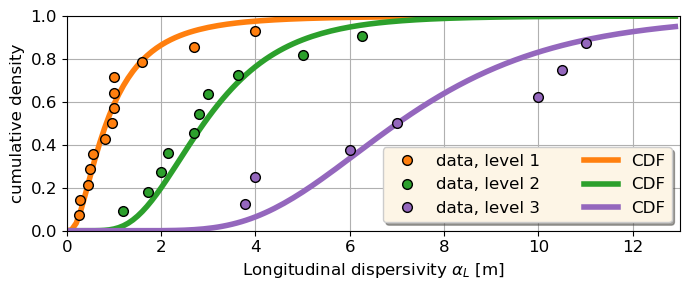

In [27]:
from scripts.visualize.plot_dispersivity_stats import plot_alphaL_cfd

fig = plot_alphaL_cfd(data_het_classes,
                      figsize=[7,3],
                      save_fig = "./results/Zech-et-al-2022_Fig1_CDF.pdf")

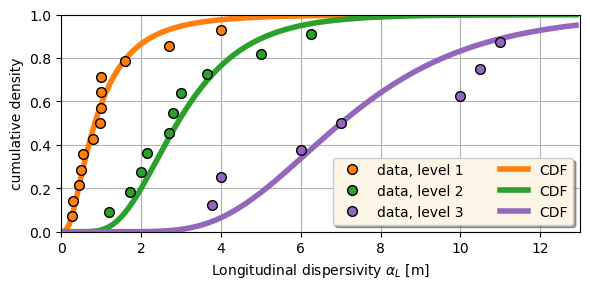

In [28]:
from scripts.analysis.statistics import cdf

### Plot settings
cc = ["C1","C2","C4"]
weights = data_xlsx["Info level"]/data_xlsx["Reliability – A_L"]

plt.figure(1,figsize=[6,3])
for ii,het_level in enumerate([1,2,3]):
    filter_het = (data_xlsx["Heterogeneity class"]==het_level)*np.isfinite(data_xlsx["A_L"])
    aL_het = data_xlsx["A_L"][filter_het]
    plt.plot(np.sort(aL_het),np.linspace(0,1,len(aL_het)+2)[1:-1],"o",ls="",mec = "k",ms=7,c=cc[ii],zorder = 3,label=f"data, level {het_level}  ")

for ii,het_level in enumerate([1,2,3]):
    filter_het = (data_xlsx["Heterogeneity class"]==het_level)*np.isfinite(data_xlsx["A_L"])
    aL_het = data_xlsx["A_L"][filter_het]
    weights_het = weights[filter_het]

    meanw_het = np.average(aL_het,weights=weights_het)
    stdw_het = np.sqrt(np.average(aL_het**2,weights=weights_het)-meanw_het**2)

    log_meanw = np.log(meanw_het**2/np.sqrt(meanw_het**2+stdw_het**2))
    log_varw = np.log(1+(stdw_het/meanw_het)**2)

    alpha_range = np.arange(0.001,13,0.1)
    lognorm_cdf = cdf(alpha_range,log_meanw,log_varw)

    plt.plot(alpha_range,lognorm_cdf,c=cc[ii],lw=4,zorder = 2,label="CDF")

plt.xlim([0,13])
plt.ylim([0,1])
plt.legend(loc="lower right",fontsize=textsize,ncol=2,facecolor="oldlace",shadow = True)
plt.xlabel(r"Longitudinal dispersivity $\alpha_L$ [m]",fontsize=textsize)
plt.ylabel("cumulative density",fontsize=textsize)
plt.tick_params(axis="both",which="major",labelsize=textsize)
plt.grid(True)
plt.tight_layout()

# plt.savefig("./results/Zech-et-al-2022_Fig1_CDF.png", dpi=300)
# plt.savefig("./results/Zech-et-al-2022_Fig1_CDF.pdf")


#### Illustrative Example: Cape Cod

Reproducing **Zech et al, 2022, Figure 3** of *Evidence Based Estimation of Macrodispersivity  for Groundwater Transport Applications*

Illustration example for an instantaneous injection in a weakly heterogeneous aquifer: (a) longitudinal mass distribution and (b) cumulative longitudinal mass distribution at times $203$ and $461$ day after injection. Red lines: median predictions; blue lines: 10th and 90th percentiles; black dots in (b): observations from the **Cape Cod experiment**.

Using implemented functions for data extraction, analysis and visualization:

Save figure to ./results/Zech-et-al-2022_Fig3_CapeCod.pdf


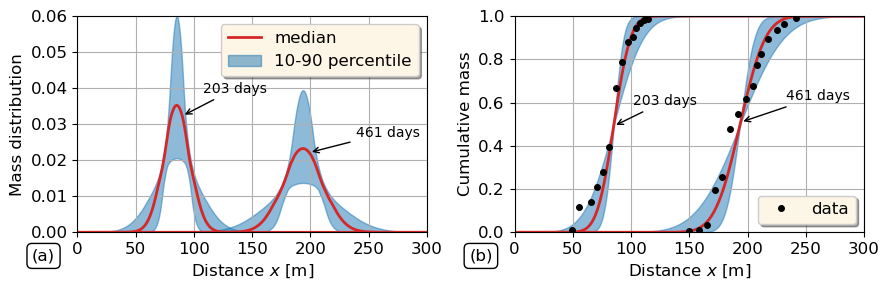

In [30]:
from scripts.analysis.monte_carlo_concentrations import mass_monte_carlo_cape_cod
from scripts.data.data_cape_cod import data_cape_cod
from scripts.data.data_cape_cod import settings_cape_cod
from scripts.visualize.plot_concentrations import plot_cape_cod_example

data_cape_cod = data_cape_cod()
settings_cape_cod = settings_cape_cod()

mass_monte_carlo_cape_cod(data_cape_cod, settings_cape_cod)

fig,ax1,ax2 = plot_cape_cod_example(data_cape_cod,
                      figsize=[9,3],
                      save_fig = "./results/Zech-et-al-2022_Fig3_CapeCod.pdf")

Performing steps individually for individual adaption:

In [31]:
### experimental settings
t1 = 203 #d
t2 = 461 #d
U = 0.42 #m/d
alphaL_mean = 1.1
alphaL_std = 1.1

Create mass distributions for random values of dispersivity from log-normal distribution:

In [33]:
from scripts.analysis.monte_carlo_concentrations import monte_carlo_alpha

x = np.arange(0,300,1) #m
m1_median, m1_90p, m1_10p = monte_carlo_alpha(x,t1,U,alphaL_mean,alphaL_std)
m2_median, m2_90p, m2_10p = monte_carlo_alpha(x,t2,U,alphaL_mean,alphaL_std)

M1_median, M1_90p, M1_10p = monte_carlo_alpha(x,t1,U,alphaL_mean,alphaL_std,cumulative = True)
M2_median, M2_90p, M2_10p = monte_carlo_alpha(x,t2,U,alphaL_mean,alphaL_std,cumulative = True)

In [34]:
### Read data values from Cape cod experiment
file_name = "./data/Cape_Cod_day_{}.csv"
data_t1 = np.loadtxt(file_name.format(t1),delimiter=",")
data_t2 = np.loadtxt(file_name.format(t2),delimiter=",")

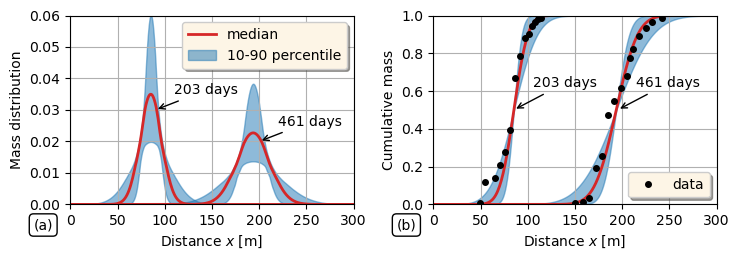

In [35]:
plt.figure(figsize=[7.5,2.7])
ax1=plt.subplot(121)
ax2=plt.subplot(122)

ax1.plot(x,m1_median,color="C3",zorder=2,lw=2,label = "median")
ax1.fill_between(x,m1_10p,m1_90p,color="C0",zorder=1,alpha = 0.5,label = "10-90 percentile")
ax1.plot(x,m2_median,color="C3",zorder=2,lw=2)
ax1.fill_between(x,m2_10p,m2_90p,color="C0",zorder=1,alpha = 0.5)
ax1.set_xlim([0,300])
ax1.set_ylim([0,0.06])
ax1.set_xlabel(r"Distance $x$ [m]",fontsize=textsize)
ax1.set_ylabel("Mass distribution",fontsize=textsize)

ax1.tick_params(axis="both",which="major",labelsize=textsize)
ax1.grid(True)
ax1.text(-0.13,-0.13,"(a)", bbox=dict(facecolor="w", alpha=1,boxstyle="round"),fontsize=textsize, transform=ax1.transAxes)
ax1.annotate(f"{t1} days",xy = (90,0.03),xytext = (110,0.035),arrowprops = dict(arrowstyle="->"))
ax1.annotate(f"{t2} days",xy = (200,0.02),xytext = (220,0.025),arrowprops = dict(arrowstyle="->"))
ax1.legend(loc = "upper right",fontsize=textsize,facecolor="oldlace",framealpha = 1,shadow=True)

ax2.plot(x,M1_median,color="C3",zorder=2,lw=2)
ax2.fill_between(x,M1_10p,M1_90p,color="C0",zorder=1,alpha = 0.5)
ax2.plot(x,M2_median,color="C3",zorder=2,lw=2)
ax2.fill_between(x,M2_10p,M2_90p,color="C0",zorder=1,alpha = 0.5)

ax2.plot(data_t1[:,0],data_t1[:,1],"ok",ms=4)
ax2.plot(data_t2[:,0],data_t2[:,1],"ok",ms=4,label = "data")
ax2.annotate(f"{t1} days",xy = (85,0.5),xytext = (105,0.62),arrowprops = dict(arrowstyle="->"))
ax2.annotate(f"{t2} days",xy = (195,0.5),xytext = (215,0.62),arrowprops = dict(arrowstyle="->"))

ax2.set_xlim([0,300])
ax2.set_ylim([0,1])
ax2.set_xlabel(r"Distance $x$ [m]",fontsize=textsize)
ax2.set_ylabel("Cumulative mass",fontsize=textsize)
ax2.tick_params(axis="both",which="major",labelsize=textsize)
ax2.grid(True)
ax2.text(-0.13,-0.13,"(b)", bbox=dict(facecolor="w", alpha=1,boxstyle="round"),fontsize=textsize, transform=ax2.transAxes)
ax2.legend(loc = "lower right",fontsize=textsize,facecolor="oldlace",framealpha = 1,shadow=True)

plt.tight_layout()
# plt.savefig( "./results/Zech-et-al-2022_Fig3_CapeCod.png",dpi = 300)


Caption: Illustration example for an instantaneous injection in a weakly heterogeneous aquifer: (a) longitudinal mass distribution and (b) cumulative longitudinal mass distribution at times $203$ and $461$ day after injection. Red lines: median predictions; blue lines: 10th and 90th percentiles; black dots in (b): observations from the Cape Cod experiment.

----------------
## Preasymptotic Longitudinal Macrodispersivity

### Evolution of preasymptotic longitudinal macrodispersivity as function of travel distance L and heterogeneity statistics

Reproducing **Zech et al, 2022, Figure A1** of *Evidence Based Estimation of Macrodispersivity  for Groundwater Transport Applications*

Caption: Evolution of preasymptotic longitudinal macrodispersivity as function of travel distance L relative to integral scales $I_h$ according to Equation A4 for three values of anisotropy rate $f$ . The $y$-axis shows the relative value to the asymptotic $\alpha_L = \sigma^2_Y \cdot I_h$.

#### Background
One of the main achievements of the stochastic theory is the derivation of the relationship between the longitudinal macrodispersivity $\alpha_{L}$ and the hydraulic conductivity statistical parameters. $\alpha_{L}$ grows with travel time from zero to the asymptotic value $\alpha_{L}=\sigma _{Y}^{2}I$ after a travel distance $L=Ut$ of a few integral scale according to Dagan, 1989. The transient period can be described approximately by the formula
$$ \alpha _{L}=\sigma_{Y}^{2}I\left[1-\exp{\left(-\frac{t\cdot U\cdot b(f)}{I}\right)}\right]\qquad \qquad b(f)=1+\frac{
19f^{2}-10f^{4}}{16(f^{2}-1)^{2}}-\frac{f(13-4f^{2})\arcsin (\sqrt{1-f^{2}})
}{16\sqrt{1-f^{2}}(f^{2}-1)^{2}}$$ 
with $b(f)$ varying between $b=8/15$ (for isotropy $f=1$) and $b=1$ (for stratified formation $f\rightarrow 0$). The result is based on advection by the Eulerian velocity field, with neglect of the much smaller contribution of the pore-scale dispersion. Here $f$ stands for the anisotropy coefficient, the ratio between the vertical and longitudinal integral scales, respectively. 

The variation of $\alpha_{L}$ with travel time can be divided into three periods: for $t\ll I/U$, $\alpha_{L}$ grows linearly with time as appropriate to stratified aquifers; an intermediate period and ultimately, the asymptotic result $\alpha_{L}=\sigma_{Y}^{2}I$ is attained for $t>I/U$, which was obtained also by Gelhar, 1983 by a different approach. The equation implies non-locality as $\alpha_{L}$ depends on the travel time $t$ from the source. However, at the large time limit it localizes and reaches Fickianity.

The simple asymptotic first-order result is very robust as it does not depend on the anisotropy ratio~$f$ and the shape of the auto-correlation $\rho$. Furthermore, it was shown by Fiori et al, 2017 that it is not limited to weakly heterogeneous aquifers and it applies also to moderate and highly heterogeneous ones, when upscaled measures are used for comparison.


Save figure to ./results/Zech-et-al-2022_FigA1_preasymptotic.pdf


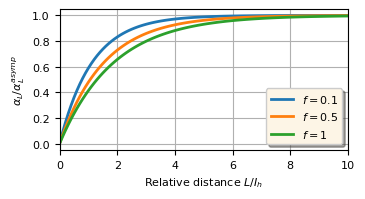

In [36]:
from scripts.analysis.preasymptotic_alphaL import sets_preasymptotic_alphaL
from scripts.visualize.plot_dispersivity_preasymptotic import plot_alphaL_preasymptotic

sets_aL = sets_preasymptotic_alphaL(sigmaY2s = [1],
                                   Ihs = [1],
                                   ees = [0.1,0.5,1],
                                   # x = np.arange(0,10.1,0.1),
                                   )

fig = plot_alphaL_preasymptotic(sets_aL,
                          xlabel = r"Relative distance $L/I_h$",
                          ylabel = r"$\alpha_L/\alpha_L^{asymp}$",
                          save_fig = "./results/Zech-et-al-2022_FigA1_preasymptotic.pdf")

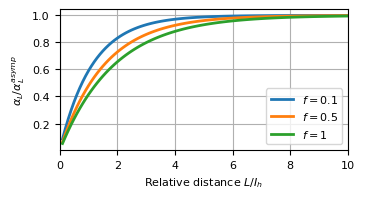

In [37]:
from scripts.analysis.preasymptotic_alphaL import preasymptotic_alphaL

plt.figure(figsize=[3.75,2.1])
textsize = 8

x = np.arange(0.1,10.1,0.1)
for ie,ee in enumerate([0.1,0.5,1]):
    alpha_x = preasymptotic_alphaL(x, sigmaY2 = 1, Ih = 1, ee = ee)
    plt.plot(x,alpha_x,lw = 2,label=rf"$f  = {ee}$")

plt.legend(loc = "lower right",fontsize=textsize)
plt.xlabel(r"Relative distance $L/I_h$",fontsize=textsize)
plt.ylabel(r"$\alpha_L/\alpha_L^{asymp}$",fontsize=textsize)
plt.tick_params(axis="both",which="major",labelsize=textsize)
plt.xlim([0,10])
plt.grid(True)
plt.tight_layout()
#plt.savefig('../results/Zech-et-al-2022_FigA1_AL_preasymptotic.pdf')


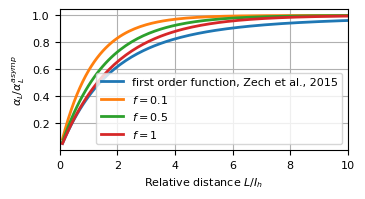

In [38]:
from scripts.analysis.preasymptotic_alphaL import preasymptotic_alphaL_FirstOrder

ell = 1
sigmaY2 = 1
x = np.arange(0.1,20*ell,0.1)
alpha_0 = preasymptotic_alphaL_FirstOrder(x,sigmaY2,ell)
alpha_1 = preasymptotic_alphaL(x, sigmaY2 = sigmaY2, Ih = ell, ee = 1)

plt.figure(figsize=[3.75,2.1])
plt.plot(x,alpha_0,lw = 2,label = "first order function, Zech et al., 2015")
for ie,ee in enumerate([0.1,0.5,1]):
    alpha_x = preasymptotic_alphaL(x, sigmaY2 = 1, Ih = 1, ee = ee)
    plt.plot(x,alpha_x,lw = 2,label=rf"$f  = {ee}$")

plt.legend(loc = "lower right",fontsize=textsize)
plt.xlabel(r"Relative distance $L/I_h$",fontsize=textsize)
plt.ylabel(r"$\alpha_L/\alpha_L^{asymp}$",fontsize=textsize)
plt.tick_params(axis="both",which="major",labelsize=textsize)
plt.xlim([0,10])
plt.grid(True)
plt.tight_layout()

### Computational Example

Reproducing **Zech et al, 2015, Figure 6** of *Is unique scaling of aquifer macrodispersivity supported by field data?* 

Caption: Macrodispersivity versus scale for $50$ synthetic aquifers of random variance $\sigma_Y^2 \in [0.1,1]$ and correlation scale $\ell \in [0.2m,10m]$. Dispersivities were calculated for every aquifer at $5$ random locations $x \in [5 m,300 m]$. Coloring (orange, blue and green) indicate the dispersivities versus scale for three selected aquifers.

In [39]:
from scripts.analysis.preasymptotic_alphaL import generate_random_preasymptotic_alpha
from scripts.analysis.preasymptotic_alphaL import random_selection

x_random,alpha_random = generate_random_preasymptotic_alpha()
x_select,alpha_select = random_selection(x_random,alpha_random)

# x_random2,alpha_random2 = random_preasymptotic_alpha(first_order=False)
# x_select2,alpha_select2 = random_selection(x_random2,alpha_random2)

Save figure to ./results/Zech-et-al-2015_Fig6_Computational_Example.pdf


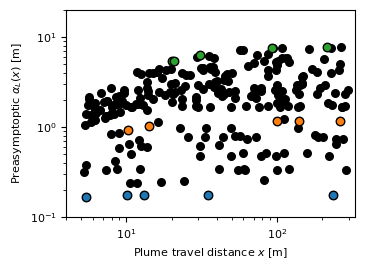

In [40]:
from scripts.visualize.plot_dispersivity_preasymptotic import plot_random_alphaL_preasymptotic

fig = plot_random_alphaL_preasymptotic(x_random,
                                 alpha_random,
                                 x_select = x_select,
                                 alpha_select = alpha_select,
                                 save_fig = "./results/Zech-et-al-2015_Fig6_Computational_Example.pdf",
                                 )

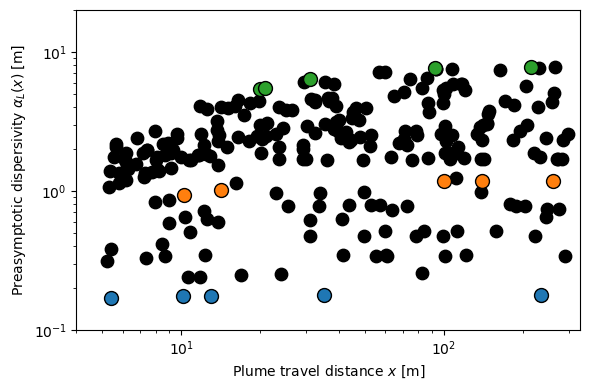

In [41]:
textsize = 10
color_points = "k"
ms = 80
xscale = "log"
yscale = "log"
xlim = [4,330]
ylim = [0.1,20]
xlabel = r"Plume travel distance $x$ [m]"
ylabel = r"Preasymptotic dispersivity $\alpha_L(x)$ [m]"
fig=plt.figure(figsize=[6,4])
plt.scatter(x_random[:,:],alpha_random[:,:],color = color_points,s = ms)
# plt.scatter(x_random2[:,:],alpha_random2[:,:],color = 'b',s = ms,alpha = 0.5)
for i in range(alpha_select.shape[0]):
    plt.scatter(x_select[i,:],alpha_select[i,:],s = 1.25*ms,edgecolor = "k")
#    plt.scatter(x_select2[i,:],alpha_select2[i,:],s = 1.2*ms,edgecolor = 'k',alpha = 0.5)

plt.xscale(xscale)
plt.yscale(yscale)
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel(xlabel,fontsize=textsize)
plt.ylabel(ylabel,fontsize=textsize)
plt.tick_params(axis="both",which="major",labelsize=textsize)
#plt.grid(True)
plt.tight_layout()